# 히스토그램

히스토그램은 여러 용도로 사용되지만 그 중 하나는 영상의 특성을 파악하는 것이다. 대부분 카메라는 사진의 히스토그램을 확인할 수 있는 기능이 있다. 

## 히스토그램 스트레칭

히스토그램 스트레칭(histogram stretching)은 이미지의 히스토그램이 그레이스케일 전 구간에 걸쳐서 나타나도록 변경하는 선형 변환 기법이다. 명암비가 낮은 이미지는 히스토그램이 특정 구간에 집중되는데 이러한 히스토그램을 마치 고무줄을 잡아 늘이듯이 펼쳐서 히스토그램 그래프가 그레이스케일 전 구간에서 나타나도록 변환하는 기법이다. 히스토그램 스트레칭을 수행한 이미지는 명암비가 높아지기 때문에 대체로 보기 좋은 사진으로 바뀌게 된다.

히스토그램은 전체 이미지에서 픽셀 값이 1인 픽셀이 몇 개고 2인 픽셀이 몇 개인지 파악해 셈하여 픽셀들의 색상이나 명암의 분포를 파악한다

```python
cv2.calHist(img, channels, mask, histSize, ranges)
```

* img: 입력 영상, [img]처럼 리스트로 표현
* channels: 처리할 채널, 리스트로 표현
    * 1채널: [0], 2채널: [0,1], 3채널: [0,1,2]
* mask: 마스크에 지정한 픽셀만 히스토그램 계산
* histSize: 계급(bin)의 개수, 채널 개수에 맞게 리스트로 표현
    * 1채널: [256], 2채널: [256,256], 3채널: [256,256,256]
* ranges: 각 필셀이 가질 수 있는 값의 범위, RGB인 경우 [0,255]

(256, 1)
196692.0 (443, 444)


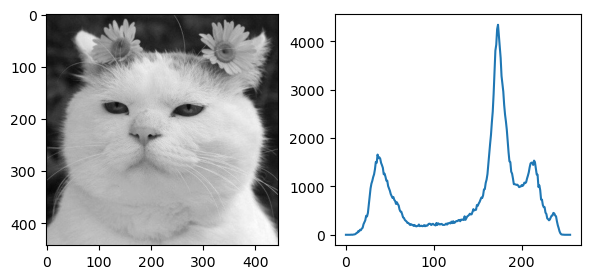

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./img/cat-01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

hist = cv2.calcHist([img], [0], None, [256], [0,256])
print(hist.shape)
print(hist.sum(), img.shape)

fig, axes = plt.subplots(ncols=2, figsize=(7,3))
axes[0].imshow(img, cmap='gray')
axes[1].plot(hist)
plt.show()

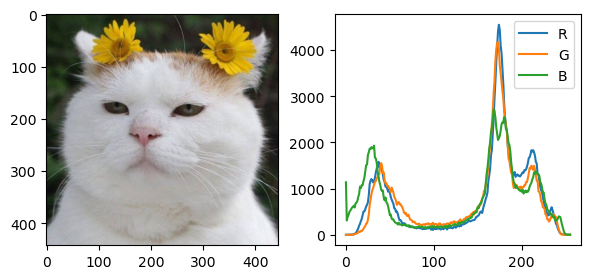

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./img/cat-01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

channels = cv2.split(img)
colors = ('R', 'G', 'B')

fig, axes = plt.subplots(ncols=2, figsize=(7,3))
axes[0].imshow(img, cmap='gray')
for (channel, color) in zip(channels, colors):
    hist = cv2.calcHist([channel], [0], None, [256], [0,256])
    axes[1].plot(hist, label=color)

axes[1].legend()
plt.show()

## 정규화

정규화(normalize)는 기준이 서로 다른 값을 같은 기준으로 비교할 수 있게 만드는 것이다. 예를 들어 1반 철수는 20문제 중에서 19문제를 맞추고, 2반 영희는 25문제 중 20문제를 맞혔다. 이때 영희가 한 문제를 더 맞혔다고 성적이 더 좋다고 말할 수 없다. 따라서 이런 문제를 100점으로 환산해 비교하는 기법으로 정규화를 사용한다. 정규화는 서로 다른 기준을 하나의 절대적인 기준으로 만들기도 하지만 절대적인 기준 대신 특정 구간으로 정규화하면 특정 부분에 몰려 있는 값을 전체 영역으로 골고루 분포하게 할 수 있다. 예를 들면, 전교생이 5명이 학생들의 성적이 95, 96, 98, 98, 100일 때 95점 이상에서 A+ 학점을 주면 전교생이 A+를 받게 되니 문제가 된다. 하지만 각 학생의 점수를 70\~100점 사이로 다시 환산해 학점을 분배하는 것이 구간 정규화이다. 원래 점수 95\~100점을 70~100점 간격으로 $30/5=6$으로 원래 점수 1점 차이는 새로운 점수 6점 차이가 된다. 

$$I=(I-\min)\frac{\text{New} \max - \text{New} \min}{\max - \min}+\text{New }\min$$

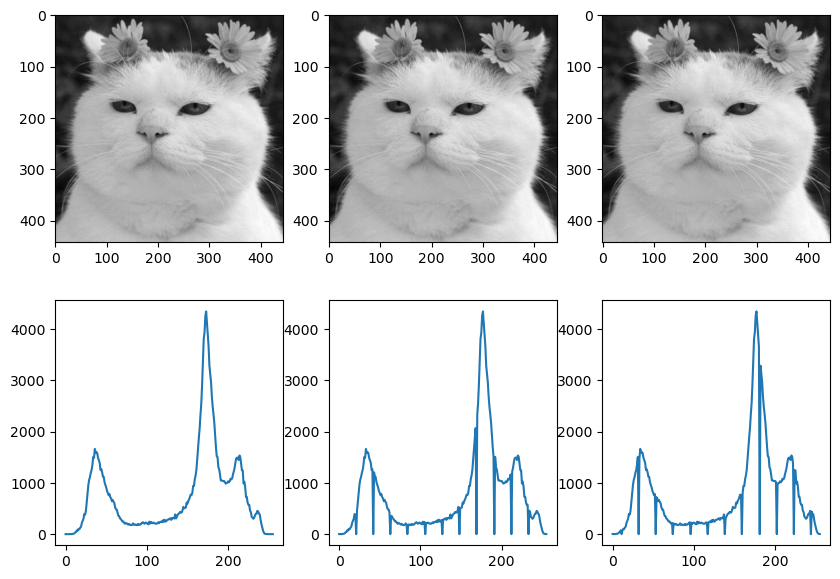

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./img/cat-01.jpg', cv2.IMREAD_GRAYSCALE)
img_float = img.astype(np.float32)

img_norm1 = ((img_float - img_float.min()) * (255) / (img_float.max() - img_float.min()))
img_norm1 = img_norm1.astype(np.uint8)

img_norm2 = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,7))

images = [img, img_norm1, img_norm2]
for i, image in enumerate(images):
    axes.flat[i].imshow(image, cmap='gray')
    hist = cv2.calcHist([image], [0], None, [256], [0,256])
    axes.flat[i+3].plot(hist)

# axes[1].legend()
plt.show()

$$\frac{src(x,y)-G_{\min}}{G_{\max}-G_{\min}}\times 255$$

## 히스토그램 평활화

히스토그램 평활화(histogram equalization)는 히스토그램 스트레칭과 더불어 이미지의 픽셀 값 분포가 그레이스케일 전체 영역에서 골고루 나타나도록 변경하는 알고리즘이다. 히스토그램 평활화는 히스토그램 그래프에서 특정 그레이스케일 값 근방에서 픽셀 분포가 너무 많이 분포되어 있는 경우 이를 넓게 펼쳐 주는 방식으로 픽셀 값 분포를 조절한다. 히스토그램 평활화는 히스토그램 균등화 또는 히스토그램 평탄화라고도 한다. 히스토그램 평활화를 구현하기 위해서는 먼저 히스토그램을 구해야 한다.

$$H^{\prime}(v)=\text{round}\bigg(\frac{\text{cdf}(v)-\text{cdf}_{\min}}{(M\times N)-\text{cdf}_{\min}} \times (L-1) \bigg)$$

(256,)


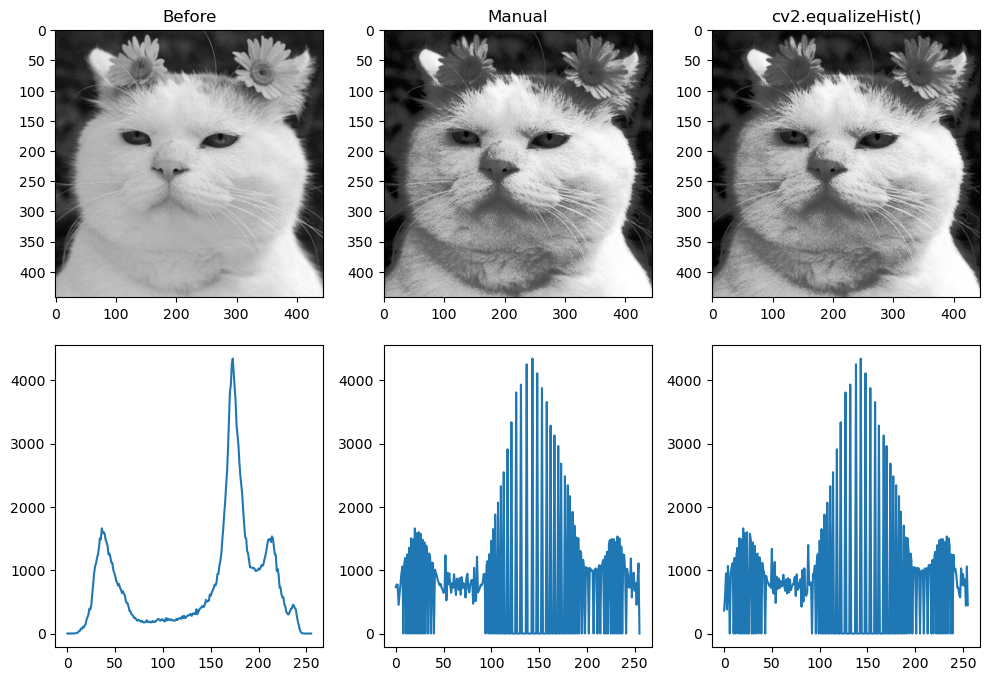

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./img/cat-01.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape[:2]

hist = cv2.calcHist([img], [0], None, [256], [0, 256])
cdf = hist.cumsum()                                   
cdf_m = np.ma.masked_equal(cdf, 0)                    
cdf_m = (cdf_m - cdf_m.min()) /(rows * cols) * 255    
cdf = np.ma.filled(cdf_m,0).astype('uint8')           
print(cdf.shape)
img2 = cdf[img]                                    

img3 = cv2.equalizeHist(img)

hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])
hist3 = cv2.calcHist([img3], [0], None, [256], [0, 256])

images = [img, img2, img3]
hists = {
    'Before':hist, 'Manual': hist2, 'cv2.equalizeHist()': hist3
}

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,7))
for i, (image, (k, v)) in enumerate(zip(images, hists.items())):
    axes.flat[i].imshow(image, cmap='gray')
    axes.flat[i].set_title(k)
    axes.flat[i+3].plot(v)

fig.tight_layout()
plt.show()

## 컬러 히스토그램 평활화

컬러 영상의 색감은 변경하지 않고 명암비를 높이려면 영상의 밝기 정보만을 사용한다. 그러므로 보통 컬러 영상에 대하여 히스토그램 평활화를 수행하려면 입력 영상의 밝기 정보와 색상 정보로 분리한 후, 밝기 정보에 대해서만 히스토그램 평활화를 수행해야 한다.

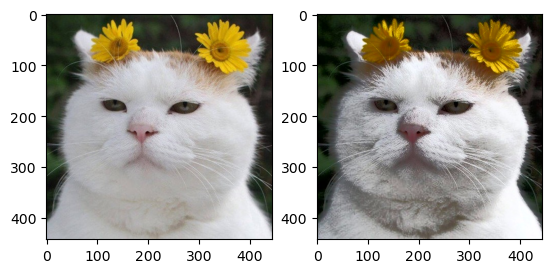

In [9]:
import cv2
import numpy as np

img = cv2.imread('./img/cat-01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV) 
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0]) 
img2 = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB) 

fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.imshow(img)
ax2.imshow(img2)
plt.show()

## CLAHE

CLAHE(contrast limiting adaptive histogram equalization)는 이미지 전체에 이퀄라이즈를 적용했을 때 너무 밝은 부분이 날아가는 현상을 막기 위해 영상을 일정한 영역으로 나눠서 이퀄라이즈를 적용한다. 노이즈가 증폭되는 것을 막기 위해 히스트그램 계급이 지정된 제한 값을 넘으면 그 픽셀은 다른 계급으로 배분하고 이퀄라이즈를 적용한다.

<div>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5f/Clahe-redist.svg/600px-Clahe-redist.svg.png" style="height: 200px" />
</div>

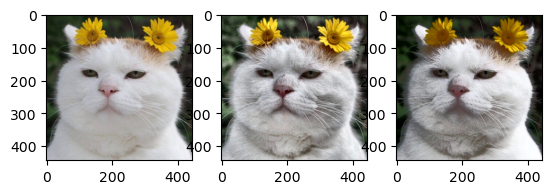

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./img/cat-01.jpg')
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

img_eq = img_yuv.copy()
img_eq[:,:,0] = cv2.equalizeHist(img_eq[:,:,0])
img_eq = cv2.cvtColor(img_eq, cv2.COLOR_YUV2RGB)

img_clahe = img_yuv.copy()
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
img_clahe[:,:,0] = clahe.apply(img_clahe[:,:,0])
img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_YUV2RGB)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
ax1.imshow(img[...,::-1])
ax2.imshow(img_clahe)
ax3.imshow(img_eq)
plt.show()

## 2D 히스토그램

1차원 히스토그램은 각 픽셀이 몇 개씩인지 세어 그래프로 표현하는데 2차원 히스토그램은 축이 2개고 각 축이 만나는 지점의 개수를 표현한다.

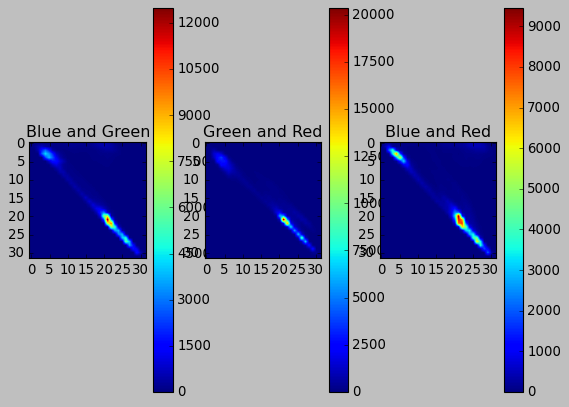

In [12]:
import cv2
import matplotlib.pyplot as plt

plt.style.use('classic')
img = cv2.imread('./img/cat-01.jpg')

plt.subplot(131)
hist = cv2.calcHist([img], [0,1], None, [32,32], [0,256,0,256])
p = plt.imshow(hist)                                           
plt.title('Blue and Green')                                    
plt.colorbar(p)                                                


plt.subplot(132)
hist = cv2.calcHist([img], [1,2], None, [32,32], [0,256,0,256])
p = plt.imshow(hist)
plt.title('Green and Red')
plt.colorbar(p)

plt.subplot(133)
hist = cv2.calcHist([img], [0,2], None, [32,32], [0,256,0,256])
p = plt.imshow(hist)
plt.title('Blue and Red')
plt.colorbar(p)

plt.show()

### 역투영

역투영(backproject)은 2차원 히스토그램과 HSV 컬러 스페이스를 이용하면 색상으로 특정 물체나 사물의 일부분을 배경에서 분리할 수 있다. 기본 원리는 객체가 있는 관심영역의 H와 V 값의 분포를 얻어낸 후 전체 영상에서 해당 분포의 픽셀만 찾아내는 것이다.

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

win_name = 'back_projection'
img = cv2.imread('./img/cat-01.jpg')
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
draw = img.copy()


def masking(bp, win_name):
    disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    cv2.filter2D(bp,-1,disc,bp)
    _, mask = cv2.threshold(bp, 1, 255, cv2.THRESH_BINARY)
    result = cv2.bitwise_and(img, img, mask=mask)
    cv2.imshow(win_name, result)


def backproject_manual(hist_roi):
    hist_img = cv2.calcHist([hsv_img], [0,1], None,[180,256], [0,180,0,256])
    hist_rate = hist_roi/ (hist_img + 1)
    h,s,v = cv2.split(hsv_img)
    bp = hist_rate[h.ravel(), s.ravel()]
    bp = np.minimum(bp, 1)
    bp = bp.reshape(hsv_img.shape[:2])
    cv2.normalize(bp,bp, 0, 255, cv2.NORM_MINMAX)
    bp = bp.astype(np.uint8)
    masking(bp,'result_manual')


def backproject_cv(hist_roi):
    bp = cv2.calcBackProject([hsv_img], [0, 1], hist_roi,  [0, 180, 0, 256], 1)
    masking(bp,'result_cv')


(x,y,w,h) = cv2.selectROI(win_name, img, False)
if w > 0 and h > 0:
    roi = draw[y:y+h, x:x+w]
    cv2.rectangle(draw, (x, y), (x+w, y+h), (0,0,255), 2)

    hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

    hist_roi = cv2.calcHist([hsv_roi],[0, 1], None, [180, 256], [0, 180, 0, 256] )

    backproject_manual(hist_roi)
    backproject_cv(hist_roi)

cv2.imshow(win_name, draw)
cv2.waitKey()
cv2.destroyAllWindows()
```

### 히스토그램 비교

히스토그램은 영상의 픽셀 값의 분포를 갖는 정보로 이것을 비교하여 이미지에 사용한 픽셀의 색상 비중이 얼마나 비슷한지 확인할 수 있다.

```python
import cv2, numpy as np
import matplotlib.pylab as plt

img1 = cv2.imread('./img/cat-01.jpg')
img2 = cv2.imread('./img/cat-02.jpeg')
img3 = cv2.imread('./img/cat-03.jpeg')
img4 = cv2.imread('./img/cat-04.jpeg')

cv2.imshow('query', img1)
imgs = [img1, img2, img3, img4]
hists = []
for i, img in enumerate(imgs) :
    plt.subplot(1,len(imgs),i+1)
    plt.title('img%d'% (i+1))
    plt.axis('off') 
    plt.imshow(img[:,:,::-1])

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0,1], None, [180,256], [0,180,0, 256])

    cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX)
    hists.append(hist)


query = hists[0]
methods = {
    'CORREL' :cv2.HISTCMP_CORREL,
    'CHISQR':cv2.HISTCMP_CHISQR, 
    'INTERSECT':cv2.HISTCMP_INTERSECT,
    'BHATTACHARYYA':cv2.HISTCMP_BHATTACHARYYA
}

for j, (name, flag) in enumerate(methods.items()):
    print('%-10s'%name, end='\t')
    for i, (hist, img) in enumerate(zip(hists, imgs)):
        ret = cv2.compareHist(query, hist, flag)
        if flag == cv2.HISTCMP_INTERSECT:
            ret = ret/np.sum(query)
        print("img%d:%7.2f"% (i+1 , ret), end='\t')
    print()

plt.show()
```

### 워크숍: 얼굴 합성

```python
import cv2
import numpy as np

alpha_width_rate = 15

img_face = cv2.imread('../img/man_face.jpg')
img_skull = cv2.imread('../img/skull.jpg')

img_comp = np.zeros_like(img_face)

height, width = img_face.shape[:2]
middle = width//2
alpha_width = width * alpha_width_rate // 100
start = middle - alpha_width//2
step = 100/alpha_width

img_comp[:, :middle, : ] = img_face[:, :middle, :].copy()
img_comp[:, middle:, :] = img_skull[:, middle:, :].copy()
cv2.imshow('half', img_comp)

for i in range(alpha_width+1 ):
    alpha = (100 - step * i) / 100
    beta = 1 - alpha
    img_comp[:, start+i] = \
        img_face[:, start+i] * alpha + img_skull[:, start+i] * beta
    print(i, alpha, beta)
    
cv2.imshow('half skull', img_comp)
cv2.waitKey()
cv2.destroyAllWindows()
```

### 워크숍: CCTV 모션 감지

```python
import cv2
import numpy as np

thresh = 25
max_diff = 5

a, b, c = None, None, None
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 480)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 320)

if cap.isOpened():
    ret, a = cap.read()
    ret, b = cap.read()

    while ret:
        ret, c = cap.read()
        draw = c.copy()
        if not ret:
            break
        
        a_gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
        b_gray = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY)
        c_gray = cv2.cvtColor(c, cv2.COLOR_BGR2GRAY)

        diff1 = cv2.absdiff(a_gray, b_gray)
        diff2 = cv2.absdiff(b_gray, c_gray)

        ret, diff1_t = cv2.threshold(diff1, thresh, 255, cv2.THRESH_BINARY)
        ret, diff2_t = cv2.threshold(diff2, thresh, 255, cv2.THRESH_BINARY)

        diff = cv2.bitwise_and(diff1_t, diff2_t)

        k = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
        diff = cv2.morphologyEx(diff, cv2.MORPH_OPEN, k)

        diff_cnt = cv2.countNonZero(diff)
        if diff_cnt > max_diff:
            nzero = np.nonzero(diff)
            cv2.rectangle(draw, (min(nzero[1]), min(nzero[0])), \
                                (max(nzero[1]), max(nzero[0])), (0,255,0), 2)
            cv2.putText(draw, "Motion Detected", (10,30), \
                                cv2.FONT_HERSHEY_DUPLEX, 0.5, (0,0,255))
        
        stacked = np.hstack((draw, cv2.cvtColor(diff, cv2.COLOR_GRAY2BGR)))
        cv2.imshow('motion sensor',stacked )

        a = b
        b = c
        
        if cv2.waitKey(1) & 0xFF == 27:
            break      
```

In [ ]:
%matplotlib inline
from skimage.exposure import cumulative_distribution
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pylab as plt
import numpy as np

def hist_matching(c, c_t, im):
    b = np.interp(c, c_t, np.arange(256))   # find closest matches to b_t
    pix_repl = {i:b[i] for i in range(256)} # dictionary to replace the pixels
    mp = np.arange(0,256)
    for (k, v) in pix_repl.items():
        mp[k] = v
    s = im.shape
    im = np.reshape(mp[im.ravel()], im.shape)
    im = np.reshape(im, s)
    return im

def cdf(im):
    c, b = cumulative_distribution(im)
    #print(b)
    for i in range(b[0]):
        c = np.insert(c, 0, 0)
    for i in range(b[-1]+1, 256):
        c = np.append(c, 1)
    return c

im = imread('images/goddess.png').astype(np.uint8)
im_t = imread('images/leaves.png')
print(np.max(im), np.max(im_t))

im1 = np.zeros(im.shape).astype(np.uint8)
for i in range(3):
    c = cdf(im[...,i])
    c_t = cdf(im_t[...,i])
    im1[...,i] = hist_matching(c, c_t, im[...,i])

plt.figure(figsize=(20,17))
plt.subplots_adjust(left=0, top=0.95, right=1, bottom=0, wspace=0.05, hspace=0.05)
plt.subplot(221), plt.imshow(im), plt.axis('off'), plt.title('Input Image', size=25)
plt.subplot(222), plt.imshow(im_t), plt.axis('off'), plt.title('Template Image', size=25)
plt.subplot(223), plt.imshow(im1[...,:3]), plt.axis('off'), plt.title('Output Image', size=25)
plt.show()

In [ ]:
im = imread('images/rocks.png').astype(np.uint8)
im_t = imread('images/sun.png')
print(np.max(im), np.max(im_t))

im1 = np.zeros(im.shape).astype(np.uint8)
for i in range(3):
    c = cdf(im[...,i])
    c_t = cdf(im_t[...,i])
    im1[...,i] = hist_matching(c, c_t, im[...,i])

plt.figure(figsize=(20,15))
plt.subplots_adjust(left=0, top=0.95, right=1, bottom=0, wspace=0.05, hspace=0.05)
plt.subplot(221), plt.imshow(im), plt.axis('off'), plt.title('Input Image', size=25)
plt.subplot(222), plt.imshow(im_t), plt.axis('off'), plt.title('Template Image', size=25)
plt.subplot(223), plt.imshow(im1[...,:3]), plt.axis('off'), plt.title('Output Image', size=25)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from skimage.io import imread
from skimage.exposure import equalize_hist, equalize_adapthist

def plot_image(image, title):
    plt.imshow(image)
    plt.title(title, size=20)
    plt.axis('off')
    
def plot_hist(img):
    colors = ['r', 'g', 'b']
    cdf = np.zeros((256,3))
    for i in range(3):
        hist, bins = np.histogram(img[...,i].flatten(),256,[0,256], normed=True)
        cdf[...,i] = hist.cumsum()
        cdf_normalized = cdf[...,i] * hist.max() / cdf.max()
        plt.plot(cdf_normalized, color = colors[i], label='cdf ({})'.format(colors[i]))
        #plt.hist(img[...,i].flatten(),256,[0,256], color = colors[i], density=True)
        binWidth = bins[1] - bins[0]
        plt.bar(bins[:-1], hist*binWidth, binWidth, label='hist ({})'.format(colors[i]))
        plt.xlim([0,256])
    plt.legend(loc = 'upper left')
    return cdf

img = imread('images/train.png')
#print(np.max(img))

plt.figure(figsize=(20,40))
#plt.gray()

plt.subplot(421), plot_image(img, 'Original Image')
plt.subplot(422) 
cdf = plot_hist(img)

img2 = np.copy(img)
for i in range(3):
    cdf_m = np.ma.masked_equal(cdf[...,i],0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    #cdf_m = 255 * cdf / cdf[-1] # normalize
    cdf2 = np.ma.filled(cdf_m,0).astype('uint8')
    img2[...,i] = cdf2[img[...,i]]

plt.subplot(423), plot_image(img2, 'Hist. Equalized')
plt.subplot(424), plot_hist(img2)

equ = (255*equalize_hist(img)).astype(np.uint8)
plt.subplot(425), plot_image(equ, 'Hist. Equalized (scikit-image)')
plt.subplot(426), plot_hist(equ)


equ = (255*equalize_adapthist(img)).astype(np.uint8)
plt.subplot(427), plot_image(equ, 'Adaptive Hist. Equalized (scikit-image)')
plt.subplot(428), plot_hist(equ)

plt.savefig('images/hist_out.png', bbox_in='tight', pad_in=0)

plt.show()